In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/train_dataset.csv")
test = pd.read_csv("./data/test.csv")

In [3]:
data.head()

,price_vnd,sim_number
0,450000,343189288
1,3000000,888899580
2,500000,928960006
3,5000000,902438679
4,450000,334307889


In [4]:
data.columns

Index(['price_vnd', 'sim_number'], dtype='object')

In [5]:
print('shape: ', data.shape)
print(data.info())

shape:  (200000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   price_vnd   200000 non-null  int64
 1   sim_number  200000 non-null  int64
dtypes: int64(2)
memory usage: 3.1 MB
None


In [6]:
print((data[['price_vnd', 'sim_number']] == 0).sum())

price_vnd     0
sim_number    0
dtype: int64


In [7]:
data.describe()

,price_vnd,sim_number
count,2.000000e+05,2.000000e+05
mean,1.395027e+07,7.304797e+08
std,5.912997e+08,2.406479e+08
min,9.900000e+04,3.250098e+08
25%,5.000000e+05,3.922605e+08
50%,1.000000e+06,8.334287e+08
75%,5.000000e+06,9.180874e+08
max,1.680000e+11,9.979797e+08


Text(0.5, 1.0, '')

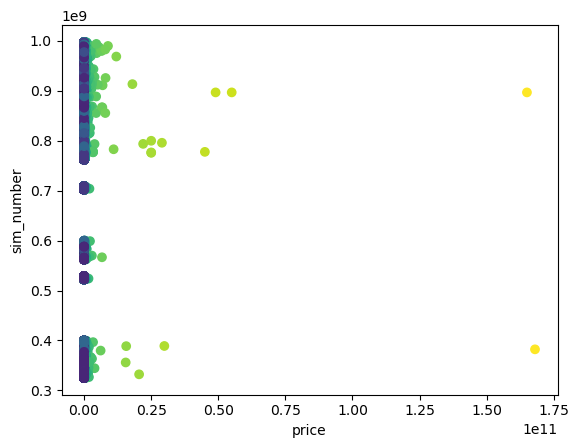

In [8]:
x1 = data.price_vnd
y1 = data.sim_number

fig, ax = plt.subplots()
plt.xlabel('price')
plt.ylabel('sim_number')
ax.scatter(x1,y1, c = np.log10(data.price_vnd));
plt.title('')

In [9]:
import re

In [10]:
tamhoa = r"([0-9])\1{2}"  #bo3giong nhau
tuquy = r"([0-9])\1{3}"   #bo4giongnhau
nguquy = r"([0-9])\1{4}"  #..5..........
lucquy = r"([0-9])\1{5}"  #..6...........
namsinh = r"([1-9]|1[0-9]|2[0-9]|3[0-1])([1-9]|1[0-2])(19[7-9][0-9]|20[0-2][0-2])$"  #dang ngay thang nam (1970-2022) 
locphat = r"(68){1,4}|(86){1,4}"  #co 68 86 
thantai = r"/(79)$|(39)$"         #duoi 79/39
ongdia = r"/(78)$|(38)$"          #duoi 78/38
taxi = r"([0-9]{2,4})\1{1,4}"     #dang lap lai tu 1 (2,3,4) chu so 1/ nhieu lan

In [11]:
data1 = data
test1 = test

In [12]:
data1['sim_number'] = data1['sim_number'].astype('string')
test1['sim_number'] = test1['sim_number'].astype('string')

In [13]:
check = '346668888888'
a = re.findall(nguquy, check)
b = re.search(nguquy, check)
print(b)
len(a)

<re.Match object; span=(5, 10), match='88888'>


1

In [14]:
def timlucquy(data1):
    if(len(re.findall(lucquy, data1['sim_number'])) == 0):
       return 0 
    else:
       return 1
data1['lucquy'] = data1.apply(timlucquy, axis=1)

def timlucquy(test1):
    if(len(re.findall(lucquy, test1['sim_number'])) == 0):
       return 0 
    else:
       return 1
test1['lucquy'] = test1.apply(timlucquy, axis=1)

In [15]:
def timnguquy(data1):
    if(len(re.findall(nguquy, data1['sim_number'])) == 0 or data1['lucquy'] == 1):
       return 0 
    else:
       return 1
data1['nguquy'] = data1.apply(timnguquy, axis=1)

def timnguquy(test1):
    if(len(re.findall(nguquy, test1['sim_number'])) == 0 or test1['lucquy'] == 1):
       return 0 
    else:
       return 1
test1['nguquy'] = test1.apply(timnguquy, axis=1)

In [16]:
def timtuquy(data1):
    if(len(re.findall(tuquy, data1['sim_number'])) == 0 or data1['nguquy'] == 1 or data1['lucquy'] == 1):
       return 0 
    else:
       return 1
data1['tuquy'] = data1.apply(timtuquy, axis=1)

def timtuquy(test1):
    if(len(re.findall(tuquy, test1['sim_number'])) == 0 or test1['nguquy'] == 1 or test1['lucquy'] == 1):
       return 0 
    else:
       return 1
test1['tuquy'] = test1.apply(timtuquy, axis=1)

In [17]:
def timtamhoa(data1):
    if(len(re.findall(tamhoa, data1['sim_number'])) == 0 or data1['tuquy'] == 1 or data1['nguquy'] == 1 or data1['lucquy'] == 1):
       return 0 
    else:
       return 1
data1['tamhoa'] = data1.apply(timtamhoa, axis=1)

def timtamhoa(test1):
    if(len(re.findall(tamhoa, test1['sim_number'])) == 0 or test1['tuquy'] == 1 or test1['nguquy'] == 1 or test1['lucquy'] == 1):
       return 0 
    else:
       return 1
test1['tamhoa'] = test1.apply(timtamhoa, axis=1)

In [18]:
def timnamsinh(data1):
    if(len(re.findall(namsinh, data1['sim_number'])) == 0):
       return 0 
    else:
       return 1
data1['namsinh'] = data1.apply(timnamsinh, axis=1)

def timnamsinh(test1):
    if(len(re.findall(namsinh, test1['sim_number'])) == 0):
       return 0 
    else:
       return 1
test1['namsinh'] = test1.apply(timnamsinh, axis=1)

In [19]:
def timlocphat(data1):
    if(len(re.findall(locphat, data1['sim_number'])) == 0):
       return 0 
    else:
       return 1
data1['locphat'] = data1.apply(timlocphat, axis=1)

def timlocphat(test1):
    if(len(re.findall(locphat, test1['sim_number'])) == 0):
       return 0 
    else:
       return 1
test1['locphat'] = test1.apply(timlocphat, axis=1)

In [20]:
def timthantai(data1):
    if(len(re.findall(thantai, data1['sim_number'])) == 0):
       return 0 
    else:
       return 1
data1['thantai'] = data1.apply(timthantai, axis=1)

def timthantai(test1):
    if(len(re.findall(thantai, test1['sim_number'])) == 0):
       return 0 
    else:
       return 1
test1['thantai'] = test1.apply(timthantai, axis=1)

In [21]:
def timongdia(data1):
    if(len(re.findall(ongdia, data1['sim_number'])) == 0):
       return 0 
    else:
       return 1
data1['ongdia'] = data1.apply(timongdia, axis=1)

def timongdia(test1):
    if(len(re.findall(ongdia, test1['sim_number'])) == 0):
       return 0 
    else:
       return 1
test1['ongdia'] = test1.apply(timongdia, axis=1)

In [22]:
def timtaxi(data1):
    if(len(re.findall(taxi, data1['sim_number'])) == 0):
       return 0 
    else:
       return 1
data1['taxi'] = data1.apply(timtaxi, axis=1)

def timtaxi(test1):
    if(len(re.findall(taxi, test1['sim_number'])) == 0):
       return 0 
    else:
       return 1
test1['taxi'] = test1.apply(timtaxi, axis=1)

In [23]:
data1

,price_vnd,sim_number,lucquy,nguquy,tuquy,tamhoa,namsinh,locphat,thantai,ongdia,taxi
0,450000,343189288,0,0,0,0,0,0,0,0,0
1,3000000,888899580,0,0,1,0,0,0,0,0,1
2,500000,928960006,0,0,0,1,0,0,0,0,0
3,5000000,902438679,0,0,0,0,0,1,0,0,0
4,450000,334307889,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
199995,450000,866161769,0,0,0,0,0,1,0,0,1
199996,1000000,708124126,0,0,0,0,0,0,0,0,0
199997,1000000,904755200,0,0,0,0,0,0,0,0,0
199998,450000,329220204,0,0,0,0,0,0,0,0,1


In [24]:
test1

,sim_number,lucquy,nguquy,tuquy,tamhoa,namsinh,locphat,thantai,ongdia,taxi
0,776260543,0,0,0,0,0,0,0,0,0
1,822977488,0,0,0,0,0,0,0,0,0
2,707963979,0,0,0,0,0,0,0,0,0
3,344134986,0,0,0,0,0,1,0,0,0
4,795718118,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
149055,822139139,0,0,0,0,0,0,1,0,1
149056,922491999,0,0,0,1,1,0,0,0,0
149057,332378966,0,0,0,0,0,0,0,0,0
149058,378492223,0,0,0,1,0,0,0,0,0


In [25]:
data1.to_csv('./data/train_data1.csv')
test1.to_csv('./data/test1.csv')

In [26]:
data2 = pd.read_csv('./data/train_data1.csv')
test2 = pd.read_csv('./data/test1.csv')
test_sim = test2["sim_number"]

In [27]:
data2.head()

,Unnamed: 0,price_vnd,sim_number,lucquy,nguquy,tuquy,tamhoa,namsinh,locphat,thantai,ongdia,taxi
0,0,450000,343189288,0,0,0,0,0,0,0,0,0
1,1,3000000,888899580,0,0,1,0,0,0,0,0,1
2,2,500000,928960006,0,0,0,1,0,0,0,0,0
3,3,5000000,902438679,0,0,0,0,0,1,0,0,0
4,4,450000,334307889,0,0,0,0,0,0,0,0,0


In [28]:
data2.loc[data2['tamhoa'] == 1]

,Unnamed: 0,price_vnd,sim_number,lucquy,nguquy,tuquy,tamhoa,namsinh,locphat,thantai,ongdia,taxi
2,2,500000,928960006,0,0,0,1,0,0,0,0,0
12,12,5000000,866615679,0,0,0,1,0,1,0,0,0
22,22,3000000,566682868,0,0,0,1,0,1,0,0,0
31,31,10000000,384076888,0,0,0,1,0,1,0,0,0
33,33,450000,334666375,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199963,199963,500000,931222623,0,0,0,1,0,0,0,0,0
199966,199966,70000000,937977799,0,0,0,1,0,0,0,0,0
199972,199972,5000000,915247222,0,0,0,1,0,0,0,0,0
199974,199974,11000000,395031888,0,0,0,1,0,0,0,0,0


In [29]:
feature = ["sim_number", "tamhoa", "lucquy", "nguquy", "tuquy", "namsinh", "locphat", "thantai", "ongdia", "taxi"]

In [30]:
X = data2[feature]
y = data2["price_vnd"]

In [31]:
X.head()

,sim_number,tamhoa,lucquy,nguquy,tuquy,namsinh,locphat,thantai,ongdia,taxi
0,343189288,0,0,0,0,0,0,0,0,0
1,888899580,0,0,0,1,0,0,0,0,1
2,928960006,1,0,0,0,0,0,0,0,0
3,902438679,0,0,0,0,0,1,0,0,0
4,334307889,0,0,0,0,0,0,0,0,0


In [32]:
y.head()

0     450000
1    3000000
2     500000
3    5000000
4     450000
Name: price_vnd, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.1, random_state=42)

In [34]:
X_train

,sim_number,tamhoa,lucquy,nguquy,tuquy,namsinh,locphat,thantai,ongdia,taxi
38762,366689829,1,0,0,0,0,1,0,0,0
76883,763202122,0,0,0,0,0,0,0,0,0
2018,862958079,0,0,0,0,0,1,0,0,0
133899,344075989,0,0,0,0,0,0,0,0,0
170373,988779586,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
119879,342541989,0,0,0,0,1,0,0,0,0
103694,939778888,0,0,0,1,0,0,0,0,1
131932,942451891,0,0,0,0,0,0,0,0,0
146867,865029439,0,0,0,0,0,1,1,0,0


In [35]:
X_valid

,sim_number,tamhoa,lucquy,nguquy,tuquy,namsinh,locphat,thantai,ongdia,taxi
119737,862935693,0,0,0,0,0,1,0,0,0
72272,866231006,0,0,0,0,0,1,0,0,0
158154,338833595,0,0,0,0,0,0,0,0,0
65426,336043199,0,0,0,0,0,0,0,0,0
30074,982409498,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
193188,924233666,1,0,0,0,0,0,0,0,0
35956,877121087,0,0,0,0,0,0,0,0,0
149399,912142021,0,0,0,0,1,0,0,0,0
97701,908719339,0,0,0,0,0,0,1,0,0


In [46]:
from sklearn.ensemble import RandomForestRegressor

dt_model = RandomForestRegressor(random_state=1)

In [47]:
dt_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [48]:
y_pred = dt_model.predict(X_valid)

In [49]:
pd.DataFrame({'y': y_valid, 'y_preds': y_pred})

,y,y_preds
119737,450000,450000.0
72272,450000,450000.0
158154,10000000,6159000.0
65426,450000,450000.0
30074,500000,452000.0
...,...,...
193188,13000000,6772000.0
35956,500000,500000.0
149399,5000000,4825000.0
97701,3000000,3765000.0


In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

mae = mean_absolute_error(y_valid, y_pred)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_valid, y_pred)
print('MSE: %.3f' % mse)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

MAE: 14428323.225
MSE: 39227236525626432.000
RMSE: 198058669.403


In [51]:
pred_feature = test2[feature]

In [52]:
submission = dt_model.predict(pred_feature)

In [53]:
df = pd.DataFrame({"price_vnd": submission, "sim_number": test_sim.values})

In [54]:
df.to_csv("./data/submission_1.csv", index=False)